# <span style="color:purple">Clustering: </span><span>Finding Restaurant Clusters for Retail Site Selection</span>

![clustering](img/restaurants_clustering_v2.gif "Density-based Clustering")


## An Example of Spatial Analysis in ArcGIS Using Density-based Clustering 

Prospecting a successful retail location requires a thorough understanding of where people shop, dine, and linger for entertainment in a study area. One useful way to start making sense of the vast quantities of retail business information and start finding the locations that matter is to use spatial clustering to find locations with a dense retail presence. 

This example starts with retail business data in Pittsburgh, PA and leverages a Spatial Statistics tool in ArcGIS named [Density-based Clustering](http://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/densitybasedclustering.htm) to separate the dense retail location data into clusters and noise. These clusters can then be the target of further analysis and potential decisions for your organization. 

# [Spatial Analysis Methodology](http://www.esri.com/library/books/the-language-of-spatial-analysis.pdf)

### 1. Ask questions: 
Formulate hypotheses and spatial
questions.

### 2. Explore the data: 
Examine the data quality,
completeness, and measurement limitations (scale
and resolution) to determine the level of analysis and
interpretation that can be supported.

### 3. Analyze and model: 
Break the problem down into
solvable components that can be modeled. Quantify
and evaluate the spatial questions.

### 4. Interpret the results: 
Evaluate and analyze the results
in the context of the question posed, data limitations,
accuracy, and other implications.

### 5. Repeat as necessary: 
Spatial analysis is a continuous
and iterative process that often leads to further
questions and refinements.

### 6. Present the results: 
The best information and
analysis becomes increasingly valuable when it can be
effectively presented and shared with a larger audience.

### 7. Make a decision: 

Spatial analysis and GIS are used to support the 
decision-making process. A successful spatial analysis 
process often leads to the understanding necessary to 
drive decisions and action.

# <span style="color:purple">1. Ask Questions</span>

## Questions:

#### Where are the locations in Pittsburgh, PA with dense restaurant retail presence?

#### Where are the clusters of restaurants with the highest average revenue? 

#### Are there clusters of restaurants whose collective revenue is greater than expected?

#### Is there a relationship between average restaurant cluster revenue and demographics?

#### Is there a relationship between average restaurant cluster revenue and transportation access? 

## Hypotheses: 

### Where are the locations in Pittsburgh, PA with dense restaurant retail presence?

- Dense restaurant clusters in Pittsburgh will likely be located in the CBD.

- Dense restaurant clusters in Pittsburgh will likely be located in near proximity to intersections of heavily trafficked roads.

### Where are the clusters of restaurants with the highest average revenue? 

- Clusters with the highest average revenue will likely be situated near downtown Pittsburgh.
- Clusters with the highest average revenue will likely be situated in neighborhoods with higher average income levels. 
- Clusters with the highest average revenue will likely be situated along major thoroughfares and near major public transit routes. 

### Are there clusters of restaurants whose collective revenue is greater than expected (i.e. revenue outliers)?

- There may be clusters with collective revenue outlier values in neighborhoods with a growing population. 
- There may be clusters with collective revenue outlier values in areas that recently underwent major redevelopment.  

### Is there a relationship between average restaurant cluster revenue and demographics?

- When considering service areas for each restaurant, there is likely positive correlation between socioeconomic status and average cluster revenue. 

### Is there a relationship between average restaurant cluster revenue and transportation access? 

- When considering service areas for each restaurant, there is likely positive correlation between average cluster revenue and proximity of the cluster to major thoroughfares. 

# <span style="color:purple">2. Explore the Data</span>

### Preliminary Setup

#### Import the needed modules, including ArcPy, the ArcGIS API for Python, and other useful modules

In [1]:
import arcpy
import arcgis
import pandas as pd
import os

#### Set reference paths to locally available data

In [2]:
# Path to File Geodatabase containing available data
file_geodatabase = "data//retail.gdb"

# Path to retail business data
businesses_fc = file_geodatabase + "//us_businesses_pittsburgh"
restaurants_fc = file_geodatabase + "//restaurants_pittsburgh"

Optional step: Parse businesses feature class by NAICS code to retrieve restaurants

### Exploring data via Table

In [3]:
# Create a spatial dataframe (python table with geometry) out of the restaurants feature class
restaurants_sdf = arcgis.features.SpatialDataFrame.from_featureclass(restaurants_fc)
restaurants_sdf

,OBJECTID,LOCNUM,CONAME,STREET,CITY,STATE,STATE_NAME,ZIP,ZIP4,NAICS,...,HDBRCH,EMPNUM,FRNCOD,ISCODE,SQFTCODE,LOC_NAME,STATUS,SCORE,SOURCE,SHAPE
0,1,402036338,RUDNICK'S,TEN MILE RD,MARIANNA,PA,Pennsylvania,15345,1080,72251117,...,,6.0,,3,A,StreetAddress,M,100.0000,INFOGROUP,"{'x': -8919964.005570533, 'y': 4867758.9117359..."
1,2,387410335,RIVERSIDE INN,FRONT ST,FREDERICKTOWN,PA,Pennsylvania,15333,,72251117,...,,5.0,,,A,StreetAddress,M,90.0938,INFOGROUP,"{'x': -8905258.700836735, 'y': 4865826.0263644..."
2,3,831505334,RIVIERA RESTAURANT LOUNGE,FRONT ST,FREDERICKTOWN,PA,Pennsylvania,15333,,72251117,...,,5.0,,,A,StreetAddress,M,100.0000,INFOGROUP,"{'x': -8905314.36058214, 'y': 4866727.02381835..."
3,4,907890941,KUKI CHINESE RESTAURANT,E 3RD ST,BETHLEHEM,PA,Pennsylvania,18015,1306,72251117,...,,3.0,,C,A,PointAddress,M,86.8281,INFOGROUP,"{'x': -8904590.783891981, 'y': 4868224.0230725..."
4,5,309912996,DOLFI'S,RIVER AVE,MASONTOWN,PA,Pennsylvania,15461,1551,72251117,...,,10.0,,,B,StreetAddress,M,100.0000,INFOGROUP,"{'x': -8896241.822082484, 'y': 4844052.5717511..."
5,6,439157900,PIZZA HUT,REDWOOD ST,MASONTOWN,PA,Pennsylvania,15461,,72251115,...,2,23.0,M,,B,StreetName,T,90.5313,INFOGROUP,"{'x': -8895774.28022115, 'y': 4844531.07518083..."
6,7,118627041,JANET'S DINER,MCCLELLANDTOWN RD,MASONTOWN,PA,Pennsylvania,15461,2504,72251117,...,,5.0,,t,A,PointAddress,M,100.0000,INFOGROUP,"{'x': -8894527.501924265, 'y': 4845430.1438411..."
7,8,214799900,CHINA GARDEN,MCCLELLANDTOWN RD,MASONTOWN,PA,Pennsylvania,15461,2508,72251117,...,,2.0,,C,A,PointAddress,M,100.0000,INFOGROUP,"{'x': -8893759.397437794, 'y': 4846532.3388230..."
8,9,217577758,SPORTY'S PIZZA OVEN & GRILLE,PENN ST,POINT MARION,PA,Pennsylvania,15474,1235,72251115,...,,2.0,,,A,StreetAddress,M,100.0000,INFOGROUP,"{'x': -8894338.258789917, 'y': 4828101.1194576..."
9,10,269742656,SUBWAY,ROBERTS RD,GRINDSTONE,PA,Pennsylvania,15442,1105,72251117,...,2,15.0,R,D,B,StreetAddress,M,100.0000,INFOGROUP,"{'x': -8890542.26415387, 'y': 4867729.84300147..."


In [36]:
# Get list of attributes (columns)
restaurants_sdf.columns.tolist()

['OBJECTID',
 'LOCNUM',
 'CONAME',
 'STREET',
 'CITY',
 'STATE',
 'STATE_NAME',
 'ZIP',
 'ZIP4',
 'NAICS',
 'SIC',
 'SALESVOL',
 'HDBRCH',
 'EMPNUM',
 'FRNCOD',
 'ISCODE',
 'SQFTCODE',
 'LOC_NAME',
 'STATUS',
 'SCORE',
 'SOURCE',
 'SHAPE']

In [5]:
# Get the data types for each column
restaurants_sdf.dtypes

OBJECTID        int64
LOCNUM         object
CONAME         object
STREET         object
CITY           object
STATE          object
STATE_NAME     object
ZIP            object
ZIP4           object
NAICS          object
SIC            object
SALESVOL      float64
HDBRCH         object
EMPNUM        float64
FRNCOD         object
ISCODE         object
SQFTCODE       object
LOC_NAME       object
STATUS         object
SCORE         float64
SOURCE         object
SHAPE          object
dtype: object

In [6]:
# Get summary statistics on numeric fields
restaurants_sdf.describe()

,OBJECTID,SALESVOL,EMPNUM,SCORE
count,5026.000000,5026.000000,5026.000000,5026.000000
mean,2513.500000,802.645444,17.216076,99.608847
std,1451.025557,1130.667265,24.190230,1.855258
min,1.000000,0.000000,1.000000,85.703100
25%,1257.250000,280.000000,6.000000,100.000000
50%,2513.500000,374.000000,8.000000,100.000000
75%,3769.750000,888.000000,19.000000,100.000000
max,5026.000000,14035.000000,300.000000,100.000000


In [7]:
# Get the restaurants with the highest sales revenue by sorting on the 'SALESVOL' column
top_sales_sdf = restaurants_sdf.sort_values(by=['SALESVOL'], ascending=False).reset_index()
print("Top 5 Restaurants in Pittsburgh by Sales Volume: ")

top_sales_sdf[['CONAME', 'SALESVOL', 'STREET', 'CITY', 'STATE', 'STATE_NAME', 'ZIP',]].head()

Top 5 Restaurants in Pittsburgh by Sales Volume: 


,CONAME,SALESVOL,STREET,CITY,STATE,STATE_NAME,ZIP
0,CHEESECAKE FACTORY,14035.0,ROSS PARK MALL DR,PITTSBURGH,PA,Pennsylvania,15237
1,EAT'N PARK,12865.0,PARK MANOR DR,PITTSBURGH,PA,Pennsylvania,15205
2,CHEESECAKE FACTORY,12631.0,S 27TH ST,PITTSBURGH,PA,Pennsylvania,15203
3,M I FRIDAY,11695.0,PERRY HWY,PITTSBURGH,PA,Pennsylvania,15229
4,NANA,11695.0,WATERFRONT DR,PITTSBURGH,PA,Pennsylvania,15222


In [8]:
# Determine the top five zip codes by average restaurant sales volume

# Use groupby object to make calculations by Zip Code
zip_groupby = restaurants_sdf.groupby(restaurants_sdf['ZIP'])
# Determine means for numeric columns by zip
zip_mean_sales_df = zip_groupby.mean().sort_values(by=['SALESVOL'], ascending=False)
# Calculate Zip ranks by average sales volume
zip_mean_sales_df['Zip Ave. Sales Rank'] = zip_mean_sales_df['SALESVOL'].rank(ascending=False)
# Drop the unneeded 'SCORE' field
del zip_mean_sales_df['SCORE']

zip_mean_sales_df

,OBJECTID,SALESVOL,EMPNUM,Zip Ave. Sales Rank
ZIP,,,,
15231,4293.818182,1862.272727,39.818182,1.0
15275,3861.695652,1801.652174,38.521739,2.0
15482,950.000000,1637.000000,35.000000,3.0
15084,1093.789474,1524.842105,32.605263,4.0
15205,3716.203540,1422.796460,30.424779,5.0
15225,3822.666667,1387.333333,29.666667,6.0
15120,1779.529412,1294.686275,29.647059,7.0
15236,2419.912281,1274.105263,27.245614,8.0
15672,626.588235,1268.058824,27.117647,9.0


### Exploring data via maps

In [9]:
# Connect to ArcGIS Online
gis = arcgis.gis.GIS("https://esrifederal.maps.arcgis.com", username="Anieto_esrifederal")

Enter password: ········


In [37]:
# Create map widget
restaurants_map = gis.map("Pittsburgh")
restaurants_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

In [38]:
restaurants_sdf.plot(kind='map',
                     map_widget=restaurants_map,
                     marker_size=3, 
                     pallette='Greys_r',
                     symbol_style='o',
                     outline_color='Greys_r',
                     line_width=.5,
                     cstep=25)

True

In [39]:
# TODO - Change view example to published service

In [12]:
# Plot the highest five selling restaurants
top_five_map = gis.map("Pittsburgh")
top_sales_sdf[['CONAME', 'SALESVOL', 'STREET', 'CITY', 'STATE', 'STATE_NAME', 'ZIP','SHAPE']].head().plot(kind='map', map_widget=top_five_map)
top_five_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

In [13]:
# Plot the lowest five selling restaurants
bot_five_map = gis.map("Pittsburgh")
bot_sales_sdf = restaurants_sdf.sort_values(by=['SALESVOL'], ascending=True).reset_index()
bot_sales_sdf[['CONAME', 'SALESVOL', 'STREET', 'CITY', 'STATE', 'STATE_NAME', 'ZIP','SHAPE']].head().plot(kind='map', map_widget=bot_five_map)
bot_five_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

### Exploring data via charts

This section will leverage plotting libraries in Python for now. When a common web charting specification is made available across ArcGIS, we could integrate an explanation of that approach in this section. 

In [14]:
# Import needed plotting modules
import matplotlib.pyplot as plt

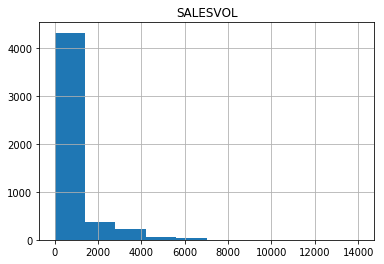

In [15]:
# Create a sales histogram
sales_histogram = restaurants_sdf.hist(column="SALESVOL")

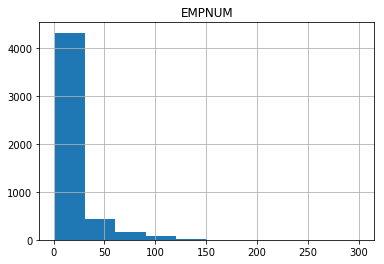

In [16]:
# Create an employee count histogram
empnum_histogram = restaurants_sdf.hist(column="EMPNUM")

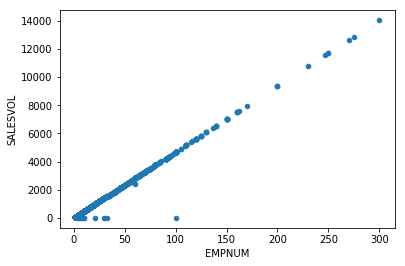

In [17]:
# Create a scatter plot of sales vs employee number
scatterplot = restaurants_sdf[['EMPNUM', 'SALESVOL']].plot(kind='scatter', x='EMPNUM', y='SALESVOL')

In [18]:
# Check the correlation between employee count at restaurant and sales volume at restaurant
restaurants_sdf['EMPNUM'].corr(restaurants_sdf['SALESVOL'])

0.9978171595302142

Top five Zip Codes by average sales volume: ['15231', '15275', '15482', '15084', '15205']


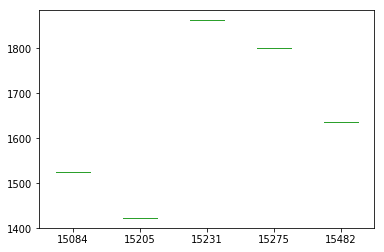

In [19]:
# Make a box plot of the top five zip codes by sales volume

# Get top five zip codes by average sales volume
top_five_zips_list = zip_mean_sales_df.index[zip_mean_sales_df['Zip Ave. Sales Rank'] <= 5].tolist()
print("Top five Zip Codes by average sales volume: "+str(top_five_zips_list))

# Create subset table for the named cities
subset_sdf = restaurants_sdf.loc[restaurants_sdf['ZIP'].isin(top_five_zips_list)]


restaurants_pivots = subset_sdf.pivot_table(columns='ZIP', values='SALESVOL')
restaurants_pivots.plot(kind='box')

### Assessment

To determine which analysis questions our data can support, let's recall our listed questions and assess how applicable the data currently is:

#### Where are the locations in Pittsburgh, PA with dense restaurant retail presence?

Assessment: The data appears to have accurate restaurant locations and can be used in conjunction with analysis tools answer this question.

#### Where are the clusters of restaurants with the highest average revenue? 

Assessment: The data appears sufficient quality for sales volume data for each restaurant, and could be used to answer this question.

#### Are there clusters of restaurants whose collective revenue is greater than expected?

Assessment: Since the two components mentioned above (location and sales revenue per restaurant) appear to be of good enough quality, this question is a matter of using the two components and can likely be addressed through this data. 

#### Is there a relationship between average restaurant cluster revenue and demographics?

Assessment: We need demographic information and a method to connect each restaurant to related geographic features with accurate demographic data, as well as more specific information on which demographics we want to study relationships for. This question is proposed for a progression version of this analysis. 

#### Is there a relationship between average restaurant cluster revenue and transportation access? 

Assessment: In a similar way to the previous question, we need transportation information and a robust method to associate restaurant patronage with nearby transportation features. This question is proposed for a future version of this analysis. 

### Next Steps

- Examine the data quality: Check for null values, check for outliers.
- Examine location quality: Make a few cells that confirm/reject the quality of geometry for the data. 
- Trash the box plot example and determine a better way to start exploring different neighborhood distributions.

# <span style="color:purple">3. Analyze and model:</span> 

Let's recall our analysis questions that survived our exploration of the data:

#### 1. Where are the locations in Pittsburgh, PA with dense restaurant retail presence?

#### 2. Where are the clusters of restaurants with the highest average revenue? 

#### 3. Are there clusters of restaurants whose collective revenue is greater than expected?

These three questions depend on finding locations with dense restaurant retail presence, or clusters based on location. Thankfully, a tool is available to help us find these clusters:

## Density-based Clustering

![clustering](img/dbclustering_01.png "Density-based Clustering")

The [Density-based Clustering tool](http://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/how-density-based-clustering-works.htm) works by detecting areas where points are concentrated and where they are separated by areas that are empty or sparse. Points that are not part of a cluster are labeled as noise.

This tool uses unsupervised machine learning clustering algorithms which automatically detect patterns based purely on spatial location and the distance to a specified number of neighbors. These algorithms are considered unsupervised because they do not require any training on what it means to be a cluster.

#### Three clustering algorithms:

The Density-based Clustering tool provides three different Clustering Methods with which to find clusters in your point data:

- _Defined distance (DBSCAN)_ — Uses a specified distance to separate dense clusters from sparser noise. The DBSCAN algorithm is the fastest of the clustering methods, but is only appropriate if there is a very clear Search Distance to use, and that works well for all potential clusters. This requires that all meaningful clusters have similar densities.

- _Self-adjusting (HDBSCAN)_ — Uses a range of distances to separate clusters of varying densities from sparser noise. The HDBSCAN algorithm is the most data-driven of the clustering methods, and thus requires the least user input.

- _Multi-scale (OPTICS)_ — Uses the distance between neighboring features to create a reachability plot which is then used to separate clusters of varying densities from noise. The OPTICS algorithm offers the most flexibility in fine-tuning the clusters that are detected, though it is computationally intensive, particularly with a large Search Distance.

### Option 1: Run locally and load into web map widget 
#### Issue: Need to determine how to load symbology or specified renderer when working with spatial dataframes

In [22]:
# Run Density-based Clustering on the restaurants feature class
if arcpy.Exists("{0}//{1}_HDBSCAN".format(file_geodatabase, "Restaurants")):
    clusters_fc = "{0}//{1}_HDBSCAN".format(file_geodatabase, "Restaurants")
else:
    clusters_fc = arcpy.stats.DensityBasedClustering(restaurants_fc, "{0}//{1}_HDBSCAN".format(file_geodatabase, "Restaurants"), "HDBSCAN", 5)
clusters_fc

'data//retail.gdb//Restaurants_HDBSCAN'

In [23]:
# Create a dataframe from the density-based clustering output
clusters_sdf = arcgis.features.SpatialDataFrame.from_featureclass(clusters_fc, sr = arcpy.SpatialReference(4326))
clusters_sdf

,OBJECTID,SOURCE_ID,CLUSTER_ID,PROB,OUTLIER,EXEMPLAR,STABILITY,COLOR_ID,SHAPE
0,1,1,-1,0.000000,0.027113,0,0.0,-1,"{'x': -80.12939999999999, 'y': 40.012500000000..."
1,2,2,-1,0.000000,0.023014,0,0.0,-1,"{'x': -79.99729999999992, 'y': 39.999199999999..."
2,3,3,-1,0.000000,0.005891,0,0.0,-1,"{'x': -79.99779999999998, 'y': 40.005400000000..."
3,4,4,56,0.173037,0.826963,0,0.0,7,"{'x': -79.99129999999997, 'y': 40.015700000000..."
4,5,5,36,1.000000,0.000000,1,0.0,4,"{'x': -79.91629999999996, 'y': 39.849200000000..."
5,6,6,36,1.000000,0.000000,1,0.0,4,"{'x': -79.91209999999994, 'y': 39.852500000000..."
6,7,7,36,1.000000,0.000000,1,0.0,4,"{'x': -79.90089999999994, 'y': 39.858700000000..."
7,8,8,36,0.790149,0.209851,0,0.0,4,"{'x': -79.89399999999995, 'y': 39.866300000000..."
8,9,9,7,1.000000,0.000000,1,0.0,8,"{'x': -79.89919999999995, 'y': 39.739100000000..."
9,10,10,56,0.357273,0.642727,0,0.0,7,"{'x': -79.86509999999997, 'y': 40.012300000000..."


In [24]:
# Publish the density-based clustering output to the GIS
fc = gis.content.import_data(clusters_sdf, title="Restaurant Clusters v1", tags="Restaurants; Clusters")
fc

<Item title:"Restaurant Clusters v1" type:Feature Layer Collection owner:Anieto_esrifederal>

In [25]:
# Retrieve data from the published service 
clusters_sdf = arcgis.features.SpatialDataFrame.from_layer(fc.layers[0])
clusters_sdf

,CLUSTER_ID,COLOR_ID,EXEMPLAR,OBJECTID,OUTLIER,PROB,SOURCE_ID,STABILITY,SHAPE
0,-1,-1,0,1,0.027113,0.000000,1,0,"{'x': -8919964.005570533, 'y': 4867758.9117359..."
1,-1,-1,0,2,0.023014,0.000000,2,0,"{'x': -8905258.700836737, 'y': 4865826.0263644..."
2,-1,-1,0,3,0.005891,0.000000,3,0,"{'x': -8905314.36058214, 'y': 4866727.02381835..."
3,56,7,0,4,0.826963,0.173037,4,0,"{'x': -8904590.783891981, 'y': 4868224.0230725..."
4,36,4,1,5,0.000000,1.000000,5,0,"{'x': -8896241.822082486, 'y': 4844052.5717511..."
5,36,4,1,6,0.000000,1.000000,6,0,"{'x': -8895774.280221151, 'y': 4844531.0751808..."
6,36,4,1,7,0.000000,1.000000,7,0,"{'x': -8894527.501924269, 'y': 4845430.1438411..."
7,36,4,0,8,0.209851,0.790149,8,0,"{'x': -8893759.397437792, 'y': 4846532.3388230..."
8,7,8,1,9,0.000000,1.000000,9,0,"{'x': -8894338.25878992, 'y': 4828101.11945760..."
9,56,7,0,10,0.642727,0.357273,10,0,"{'x': -8890542.264153872, 'y': 4867729.8430014..."


In [26]:
clusters_map = gis.map("Pittsburgh")
clusters_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

In [27]:
clusters_sdf.plot(kind='map', map_widget=clusters_map, renderer_type='u', col="COLOR_ID")

True

In [34]:
# arcgis.mapping.generate_renderer?

In [ ]:
# clusters_map.add_layer(fc, {"renderer":"unique", "field_name": "COLOR_ID"})

### Option 2 (Temporary): Use previously run analysis to work with inherent symbology 

<Item title:"HDBSCAN_restaurants_5mfc" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
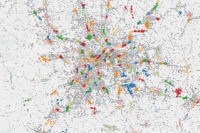

In [28]:
cluster_item = gis.content.search("HDBSCAN_restaurants_5mfc", item_type="feature service")[0]
cluster_item

In [29]:
clusters_map = gis.map("Pittsburgh")
clusters_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

### Option 3? - Run Portal/AGOL Density-based Clustering

## Directional Distribution (Standard Deviational Ellipse)

![ellipses](img/ellipses_01.png "Standard Deviational Ellipses") 

While you can get a sense of the clusters by running Density-based Clustering and drawing output cluster features on a map, calculating the standard deviational ellipse makes the trend clear.

### Option 1: Run locally and load into web map widget 
#### Issue: Need to determine how to load symbology or specified renderer when working with spatial dataframes

In [30]:
clusters_map.add_layer(cluster_item)

### Option 2 (Temporary): Use previously run analysis

<Item title:"Ellipses_HDBSCAN_restaurants_5mfc" type:Feature Layer Collection owner:albe9057@esri.com_esrifederal>
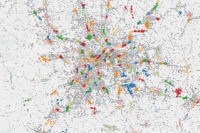

In [31]:
ellipses_item = gis.content.search("Ellipses_HDBSCAN_restaurants_5mfc", item_type="feature service")[0]
ellipses_item

In [32]:
ellipses_map = gis.map("Pittsburgh")
ellipses_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

In [34]:
# Add layers to the map
ellipses_map.add_layer(cluster_item)
ellipses_map.add_layer(ellipses_item)

# <span style="color:purple">4. Interpret the Results:</span> 

Let's recall our analysis questions and stated hypotheses:

### Where are the locations in Pittsburgh, PA with dense restaurant retail presence?

#### Stated Hypotheses:

- Dense restaurant clusters in Pittsburgh will likely be located in the CBD.

- Dense restaurant clusters in Pittsburgh will likely be located in near proximity to intersections of heavily trafficked roads.

#### Assessment:

### Where are the clusters of restaurants with the highest average revenue? 

#### Stated Hypotheses:

- Clusters with the highest average revenue will likely be situated near downtown Pittsburgh.
- Clusters with the highest average revenue will likely be situated in neighborhoods with higher average income levels. 
- Clusters with the highest average revenue will likely be situated along major thoroughfares and near major public transit routes. 

#### Assessment:

### Are there clusters of restaurants whose collective revenue is greater than expected (i.e. revenue outliers)?

#### Stated Hypotheses:

- There may be clusters with collective revenue outlier values in neighborhoods with a growing population. 
- There may be clusters with collective revenue outlier values in areas that recently underwent major redevelopment.

#### Assessment:

### Next Steps:

- Assess whether the outputs help address each analysis question.
- Address assumptions and issues in the current iteration of the analysis. 
- Determine which refinements are needed for the next iteration. 

# <span style="color:purple">5. Repeat as Necessary:</span> 

### Next Steps

- Run different methods of Density-based Clustering (OPTICS, DBSCAN)
- Determine how different parameter inputs for a single clustering method alter the results
- Assess the three questions with each iteration. 

# <span style="color:purple">6. Present the Results:</span> 

### Next Steps

- Publish the final output layers.
- Design a web map to contain the final information products that answer each question. 
- Optional: Design and launch a story map using the Python API to contain the narrative and explanation of the analysis. 

# <span style="color:purple">7. Make a Decision:</span> 

### Next Steps

- To be determined.